## Distance Metrics

When would we use Distance Metrics?

The most intuitive one
* Euclidean distance: 
    + Generalization: Minkowski distance (Norm 1: Manhattan distance)
    + but can be problematic

Problem 1: Does not count relativity between variables
* Cosine Distance

Problem 2: Variables may correlate with each other.
* Mahalanobis distance

Other distance metric:
* Jaccard distance


To devise a clustering methods, we need to 
* Step 1: define a distance metric between objects $d(x_1, x_2)$
* Step 2: define an objective function (clustering goal)
* Step 3: optimize the objective function by updating parameters



## Problem

In [85]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

digit_zero=pd.read_csv("data/digitData0.csv",header=None)
digit_one=pd.read_csv("data/digitData1.csv",header=None)

# merge
df=pd.concat([digit_zero,digit_one],join="inner")
df.columns=["feature_"+str(i+1) for i in range(df.shape[1]-1)] + ["target"]
df.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [77]:
print(sum(df.isna().any()))
print("columns:", df.columns)
print("Statistics:", df.describe())
print("The number of examples:", df.shape)

0
columns: Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50',
       'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55',
       'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60',
       'feature_61', 'feature_62', 'feature_63', 'feature_64', 'target'],


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


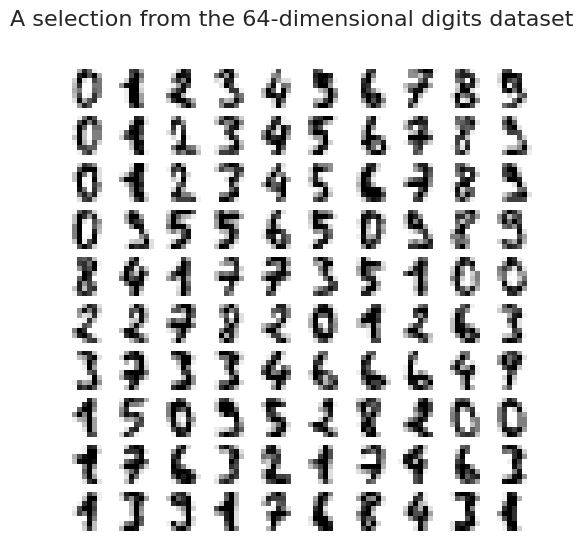

In [86]:
import matplotlib.pyplot as plt
examples = df.to_numpy()

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    example = examples[idx, :]
    ax.imshow(example[:64].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


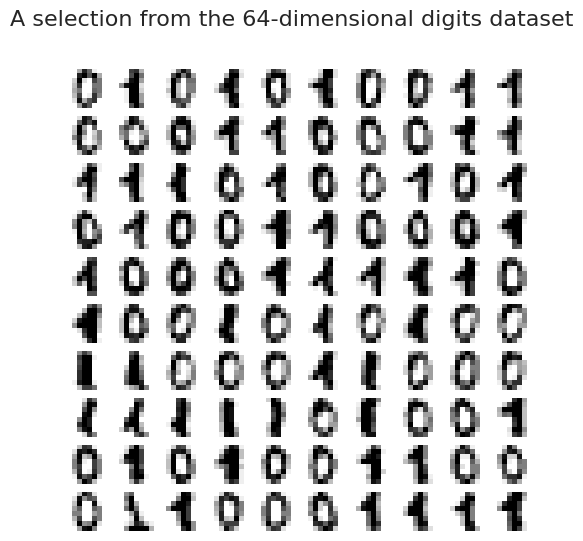

In [87]:
# only select digits 0, 1
df['target'] = df['target'].astype(int)
df_selected = df[(df.target==0) | (df.target==1)]

examples = df_selected.to_numpy()

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    example = examples[idx, :]
    ax.imshow(example[:64].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [88]:
X=df_selected.iloc[:,:-1]
y=df_selected.iloc[:,-1]

## K means
* Centroids - Clusters of data points
* What are parameteers of a K-means model?

In [90]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Evaluating K-means
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

## Generate synthetic dataset with 8 random clusters
model = KMeans(n_clusters=2)
y_pred=model.fit_predict(X)


## Let's evaluate the model.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

[[320   0]
 [  4 323]]


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

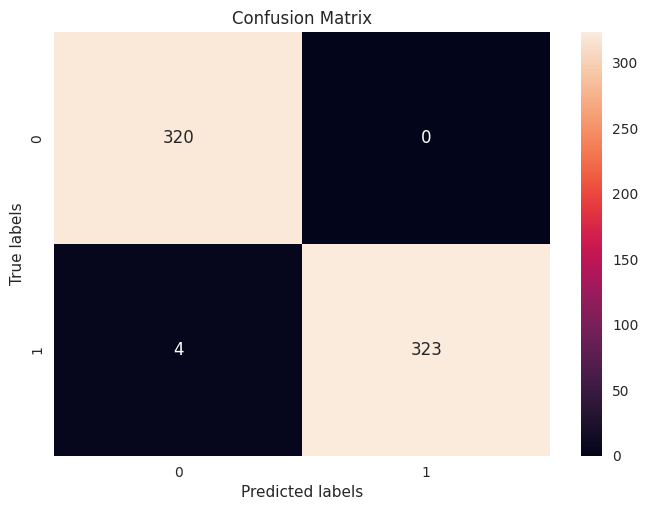

In [91]:
## Confusion matrix
from sklearn import metrics
import seaborn as sns

## compute confusion matrix
contingency_matrix = metrics.cluster.contingency_matrix(y, y_pred)
print(contingency_matrix)

## visualize
ax= plt.subplot()
sns.heatmap(contingency_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

In [66]:
# precision: how many examples are correctly predicted during all predictions for a target

# recall: how many examples are correctly predicted during all examples of one class

# F1 = 2 * (precision * recall) / (precision + recall)

In [13]:
## precision, recall, f1
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, labels=[0, 1], target_names=["zero","one"]))

              precision    recall  f1-score   support

        zero       0.99      1.00      0.99       320
         one       1.00      0.99      0.99       327

    accuracy                           0.99       647
   macro avg       0.99      0.99      0.99       647
weighted avg       0.99      0.99      0.99       647



In [19]:
## purity
correct_predictions = np.amax(contingency_matrix, axis=0)
purity_score =  np.sum(correct_predictions) / np.sum(contingency_matrix) 
purity_score

0.9938176197836167

More evaluation metrics
* Mutual Information
* Silhouette Coefficient



If we do not know that $X$ contains features for 2 digits.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

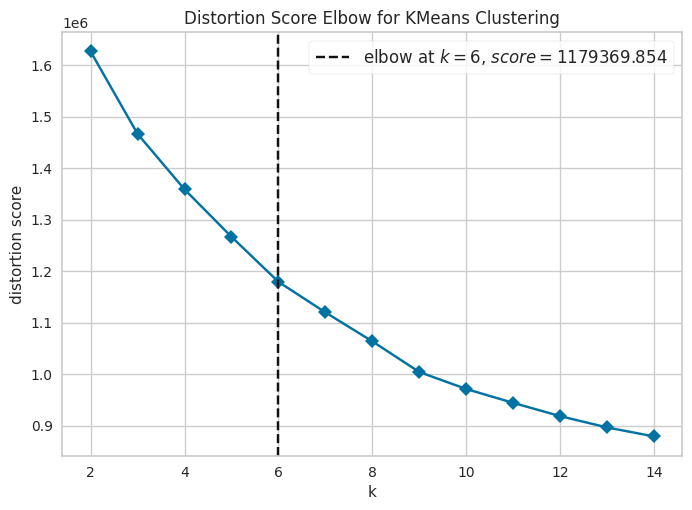

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:


# Instantiate the clustering model and visualizer for selecting the optimal k value
model = KMeans()

# determine the parameter K by visualization
visualizer = KElbowVisualizer(
    model, k=(2,15), metric='distortion', timings=False
)
visualizer.fit(X) 
visualizer.show() 

## Hierarchical Clustering
* Agglomerative clustering

Materials:
* [Sklearn document about clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X=Feature_set.iloc[:,0:-1]
y_true=Feature_set.iloc[:,-1]
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0,linkage="complete", affinity="cosine",n_clusters=None)
model = model.fit(X)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


model = AgglomerativeClustering( linkage="complete", affinity="cosine",n_clusters=2)

y_pred = model.fit_predict(X)
print(
    "purity_score: %0.3f"
    % purity_score(y_true, y_pred)
)

## Other clustering algorithms: [VAT, iVAT](https://medium.com/analytics-vidhya/using-visualization-algorithms-vat-ivat-to-assess-cluster-tendency-a89251a2400e#:~:text=iVAT%20is%20a%20visual%20method%20of%20assessing%20the,clearer%20densely%20black%20squares%2Frectangles%20in%20its%20printed%20map.)

## Pass Activity
For Q2, I refer to [this web](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

In [92]:
# Load data from digitData2.csv" file. The last column of each file presents the label and rest of the columns are features. 
df = pd.read_csv("data/digitData2.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# len(y.unique())


In [84]:

# Selecting the optimum k value using Silhouette Coefficient and plot the optimum k values. 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    # sample_silhouette_values = silhouette_samples(X, cluster_labels)


For n_clusters = 2 The average silhouette_score is : 0.11910966232005016
For n_clusters = 3 The average silhouette_score is : 0.12626341598309826
For n_clusters = 4 The average silhouette_score is : 0.12329960554402329
For n_clusters = 5 The average silhouette_score is : 0.13719234662346813
For n_clusters = 6 The average silhouette_score is : 0.12990355017210053
For n_clusters = 7 The average silhouette_score is : 0.1458891175347931
For n_clusters = 8 The average silhouette_score is : 0.18442912644580345
For n_clusters = 9 The average silhouette_score is : 0.1947937640470893
For n_clusters = 10 The average silhouette_score is : 0.1932312292911439
For n_clusters = 11 The average silhouette_score is : 0.18835419440876394
For n_clusters = 12 The average silhouette_score is : 0.17287029645050184


In [53]:
# Create clusters using Kmeans and Kmeans++ algorithms with optimal k value found in the previous problem. Report performances using appropriate evaluation metrics. Compare the results. 
model = KMeans(n_clusters=9, init="random")
y_pred=model.fit_predict(X)
silhouette_avg = silhouette_score(X, y_pred)
print(silhouette_avg)

/home/xinzhe/miniconda3/envs/sit720/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.19484358885728867


In [55]:

model = KMeans(n_clusters=9, init="k-means++")
y_pred=model.fit_predict(X)
silhouette_avg = silhouette_score(X, y_pred)
print(silhouette_avg)


/home/xinzhe/miniconda3/envs/sit720/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.19494176427324408


In [56]:
# Now repeat clustering using Kmeans for 50 times and report the average performance. 
# Again compare the results that you have obtained in Q3 using Kmeans++ and explain the difference (if any).
results = []
for _ in range(50):
    model = KMeans(n_clusters=9, init="random")
    y_pred=model.fit_predict(X)
    silhouette_avg = silhouette_score(X, y_pred)
    results.append(silhouette_avg)


/home/xinzhe/miniconda3/envs/sit720/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/xinzhe/miniconda3/envs/sit720/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/xinzhe/miniconda3/envs/sit720/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/xinzhe/miniconda3/envs/sit720/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

In [60]:
sum(results) / len(results)

0.19334582439606396

In [61]:
results_plus = []
for _ in range(50):
    model = KMeans(n_clusters=9, init="k-means++")
    y_pred=model.fit_predict(X)
    silhouette_avg = silhouette_score(X, y_pred)
    results_plus.append(silhouette_avg)

/home/xinzhe/miniconda3/envs/sit720/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/xinzhe/miniconda3/envs/sit720/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/xinzhe/miniconda3/envs/sit720/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/xinzhe/miniconda3/envs/sit720/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

In [62]:
sum(results_plus) / len(results_plus)

0.19489591215293886

DB-SCAN (Density-Based Spatial Clustering of Applications with Noise)
* Two Parameters
* Core points, border points and noise

In [ ]:
# 5. Apply DBSCAN on this dataset (digitData2.csv) and find the optimum "eps" and "min_samples" value. 
# Is the number of cluster same as the cluster found in Q2? 
# Explain the similarity or differences that you have found between two solutions. 
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3, min_samples=10)
y_pred=model.fit_predict(X)
